# (Homework) Week 6 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** Rami Gorovoi-Abu Hashish \
**Email:** ra3564@nyu.edu

---

### Problem 1: Dataset Splitting

1. You have recordings of 44 phones from 100 people; each person records ~200 phones/day for 5 days.
   - Design a valid training/validation/test split strategy that ensures the model generalizes to **new speakers**.

2. You now receive an additional dataset of 10,000 phone recordings from **Kilian**, a single speaker.
   - You must train a model that performs well **specifically for Kilian**, while also maintaining generalization.

*Describe your proposed split strategy and reasoning.* (Theory)

In [ ]:
# This problem requires a speaker-independent split for generalization, and transfer
# learning with Kilian's data for specialization.
# 1) For the first part, we can split the 100 speakers into 80 speakers for the
# training set, 10 speakers for the validation set, and 10 speakers for the test
# set. Leaving the most speakers for training allows for a broader range to teach
# the model, while the last two groups of 10 tune the parameters and provide an
# unbiased evaluation of the model. If the same speaker is in the training and test
# sets, it would lead to bias in test accuracy and increased risk of failer for a new
# speaker.
# 2) For Killian, we can follow a similar train/validation/test split of 8,000 for
# the training set, 1,000 for the validation set, and 1,000 for the test set from
# Killian's dataset. We will train the base model first, then finetune it to create
# a model that performs well for Killian while maintaining generalization.

### Problem 2: K-Nearest Neighbors

1. **1-NN Classification:** Given dataset:

   Positive: (1,2), (1,4), (5,4)

   Negative: (3,1), (3,2)

   Plot the 1-NN decision boundary and classify new points visually.

2. **Feature Scaling:** Consider dataset:

   Positive: (100,2), (100,4), (500,4)

   Negative: (300,1), (300,2)

   What would the 1-NN classify point (500,1) as **before and after scaling** to [0,1] per feature?

3. **Handling Missing Values:** How can you modify K-NN to handle missing features in a test point?

4. **High-dimensional Data:** Why can K-NN still work well for images even with thousands of pixels?


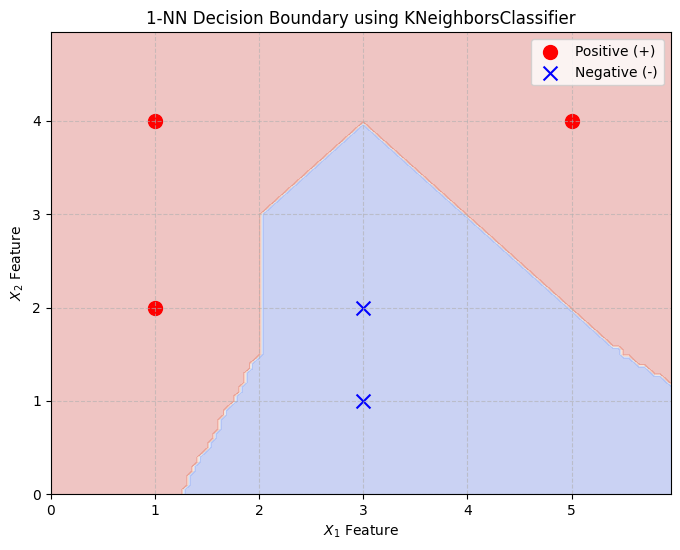

In [ ]:
from os import eventfd_write
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Define dataset
X_pos = np.array([[1, 2], [1, 4], [5, 4]])
X_neg = np.array([[3, 1], [3, 2]])

# Combining data
X_train = np.vstack([X_pos, X_neg])
y_train = np.array([1, 1, 1, 0, 0])

# 1-NN Classifier, set n_neighbors=1 for 1-NN
clf = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
clf.fit(X_train, y_train)

# Creating grid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

grid_points = np.c_[xx.ravel(), yy.ravel()]

# Classifying grid points
Z = clf.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_pos[:, 0], X_pos[:, 1], c='red', marker='o', s=100, label='Positive (+)')
plt.scatter(X_neg[:, 0], X_neg[:, 1], c='blue', marker='x', s=100, label='Negative (-)')

plt.title('1-NN Decision Boundary using KNeighborsClassifier')
plt.xlabel('$X_1$ Feature')
plt.ylabel('$X_2$ Feature')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 2) The 1-NN would classify point (500,1) as positive before scaling to [0,1].
# After scaling using min-max normalization, the point would be classified as
# negative. Scaling changes the classification as it gives the small
# Y-difference feature the same weight as the X-feature.

# 3) To modify K-NN to handle missing features in a test point, you can use
# imputation - replacing the missing values with the mean or median of the
# entire training set. You can also use a modified distance metric, calculating
# the distance using features present in both the test and training points, and
# scaling the distance result to account for the missing features.

# 4) K-NN still work well for images even with thousands of pixels because of
# low intrinsic dimensionality and semantic similarity. Due to the low
# dimensions of image daata within a high-dimensional space, distances
# calculated in the immediate vicinity of the K-NN local algorithm remain
# meaningful, allowing for accurate classification and high visual similarity
# between images. %% [markdown]

### Problem 3: Part 1

You are given a fully trained Perceptron model with weight vector **w**, along with training set **D_TR** and test set **D_TE**.

1. Your co-worker suggests evaluating $h(x) = sign(w \cdot x)$ for every $(x, y)$ in D_TR and D_TE. Does this help determine whether test error is higher than training error?
2. Why is there no need to compute training error explicitly for the Perceptron algorithm?

In [ ]:
# 1) Yes, this does help with determining whether test error is higher than training error.
# Evaluating h(x) on D_TR and D_TE directly calculates the test error and the training
# error. Comparing these two calculations lets you determine if the model is overfitting
# or underfitting. If the test error is greater than the training error, the model is
# overfitting.

# 2) The Perceptron algorithm is guaranteed to find a solution with no training error,
# as it is an error-driven algorithm. The algorithm only collets one miscallsifed point, continuining
# until none remain.

### Problem 3: Two-point 2D Dataset (Part 2)

Run the Perceptron algorithm **by hand or in code** on the following data:

1. Positive class: (10, -2)
2. Negative class: (12, 2)

Start with $w_0 = (0, 0)$ and a learning rate of 1.

- Compute how many updates are required until convergence.
- Write down the sequence of $w_i$ vectors.

In [3]:
import numpy as np

# Define data
# positive x1 = (1, 10, -2), y1 = +1
# negative x2 = (1, 12, 2), y2 = -1
X = np.array([[1, 10, -2], [1, 12, 2]])
Y = np.array([+1, -1])

# Weight vector w0
w = np.array([0, 0, 0])
eta = 1  # Learning rate
updates = 0
w_history = [w.copy()]

# Perceptron algorithm
converged = False
max_iterations = 20

print(f"Starting W: {w}")

while not converged and updates < max_iterations:
    misclassified_count = 0
    for i in range(len(X)):
        x_i = X[i]
        y_i = Y[i]
        score = np.dot(w, x_i)

        # Misclassification if y_i * score <= 0
        if y_i * score <= 0:
            w = w + eta * y_i * x_i
            updates += 1
            w_history.append(w.copy())
            misclassified_count += 1
            print(f"Update {updates}: Misclassified point {i+1} ({x_i[1:]}, y={y_i})")
            print(f"New W: {w}")

    # Check for convergence
    if misclassified_count == 0:
        converged = True
        print(f"CONVERGED at W: {w}")

# Results
print(f"Total updates required until convergence: {updates}")
print("Sequence of W_i vectors:")
for idx, vec in enumerate(w_history):
    print(f"w{idx}: {vec}")

Starting W: [0 0 0]
Update 1: Misclassified point 1 ([10 -2], y=1)
New W: [ 1 10 -2]
Update 2: Misclassified point 2 ([12  2], y=-1)
New W: [ 0 -2 -4]
Update 3: Misclassified point 1 ([10 -2], y=1)
New W: [ 1  8 -6]
Update 4: Misclassified point 2 ([12  2], y=-1)
New W: [ 0 -4 -8]
Update 5: Misclassified point 1 ([10 -2], y=1)
New W: [  1   6 -10]
Update 6: Misclassified point 2 ([12  2], y=-1)
New W: [  0  -6 -12]
Update 7: Misclassified point 1 ([10 -2], y=1)
New W: [  1   4 -14]
Update 8: Misclassified point 2 ([12  2], y=-1)
New W: [  0  -8 -16]
Update 9: Misclassified point 1 ([10 -2], y=1)
New W: [  1   2 -18]
CONVERGED at W: [  1   2 -18]
Total updates required until convergence: 9
Sequence of W_i vectors:
w0: [0 0 0]
w1: [ 1 10 -2]
w2: [ 0 -2 -4]
w3: [ 1  8 -6]
w4: [ 0 -4 -8]
w5: [  1   6 -10]
w6: [  0  -6 -12]
w7: [  1   4 -14]
w8: [  0  -8 -16]
w9: [  1   2 -18]


### Problem 4: Reconstructing the Weight Vector

Given the log of Perceptron updates:

| x | y | count |
|---|---|--------|
| (0, 0, 0, 0, 4) | +1 | 2 |
| (0, 0, 6, 5, 0) | +1 | 1 |
| (3, 0, 0, 0, 0) | -1 | 1 |
| (0, 9, 3, 6, 0) | -1 | 1 |
| (0, 1, 0, 2, 5) | -1 | 1 |

Assume learning rate = 1 and initial weight $w_0 = (0, 0, 0, 0, 0)$.

Compute the final weight vector after all updates.

In [12]:
import numpy as np

# Initial weight vector (w0)
w0 = np.array([0, 0, 0, 0, 0])

# Define updates based on the given log - positive updates added
update_pos_1 = np.array([0, 0, 0, 0, 4])
update_pos_2 = np.array([0, 0, 6, 5, 0])

# Negative updates subtracted
update_neg_3 = np.array([3, 0, 0, 0, 0])
update_neg_4 = np.array([0, 9, 3, 6, 0])
update_neg_5 = np.array([0, 1, 0, 2, 5])

# Compute final weight vector, adding positive updates and subtracting negative
w_final = w0 + update_pos_1 + update_pos_2 - update_neg_3 - update_neg_4 - update_neg_5

print(f"Initial W (w0) = {w0}")
print(f"Positive updates = {update_pos_1 + update_pos_2}")
print(f"Negative updates = {update_neg_3 + update_neg_4 + update_neg_5}")
print(f"Final weight vector after all updates = {w_final}")

Initial W (w0) = [0 0 0 0 0]
Positive updates = [0 0 6 5 4]
Negative updates = [ 3 10  3  8  5]
Final weight vector after all updates = [ -3 -10   3  -3  -1]


### Problem 5: Visualizing Perceptron Convergence

Implement a Perceptron on a small 2D dataset with positive and negative examples.

- Plot the data points.
- After each update, visualize the decision boundary.
- Show how it converges to a stable separator.

Total updates for convergence: 9


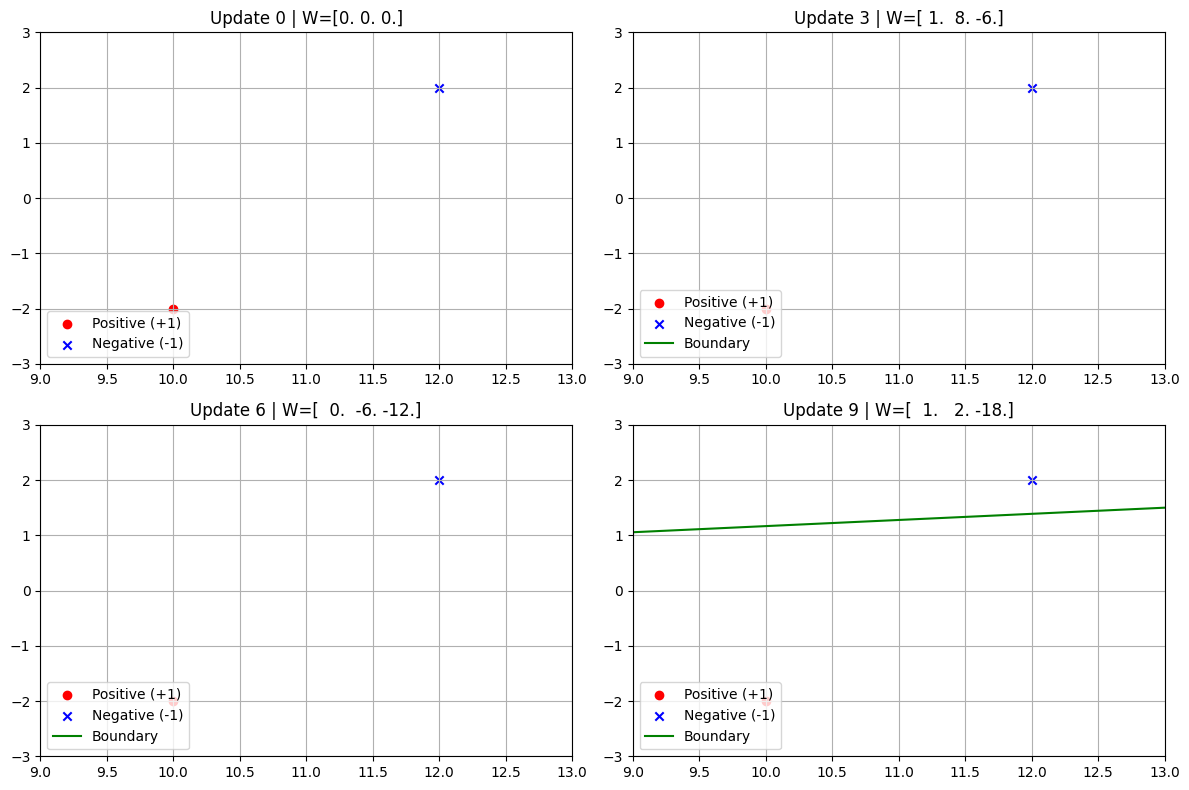

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
X = np.array([[1, 10, -2], [1, 12, 2]])
Y = np.array([+1, -1])
w = np.array([0.0, 0.0, 0.0])
w_history = [w.copy()]

# Perceptron algorithm
converged = False
while not converged:
    misclassified_count = 0
    for i in range(len(X)):
        x_i, y_i = X[i], Y[i]

        # Check for misclassification
        if y_i * np.dot(w, x_i) <= 0:
            w += y_i * x_i
            w_history.append(w.copy())
            misclassified_count += 1

    if misclassified_count == 0:
        converged = True

print(f"Total updates for convergence: {len(w_history) - 1}")

# Visualize the decision boundary
def plot_boundary(w_vec, iteration):
    X_plot = np.array([[10, -2], [12, 2]])
    plt.scatter(X_plot[0, 0], X_plot[0, 1], color='red', marker='o', label='Positive (+1)')
    plt.scatter(X_plot[1, 0], X_plot[1, 1], color='blue', marker='x', label='Negative (-1)')

    w0, w1, w2 = w_vec

    # Plot line: x2 = -(w0/w2) - (w1/w2) * x1
    if not np.isclose(w2, 0):
        x1_range = np.linspace(9, 13, 100)
        x2_line = -(w0 / w2) - (w1 / w2) * x1_range
        plt.plot(x1_range, x2_line, color='green', linestyle='-', label='Boundary')

    plt.title(f'Update {iteration} | W={np.round(w_vec, 1)}')
    plt.xlim(9, 13); plt.ylim(-3, 3); plt.grid(True)
    plt.legend(loc='lower left')

# Plot key steps: w0, w3, w6, and w9
plt.figure(figsize=(12, 8))
# (w0)
plt.subplot(2, 2, 1)
plot_boundary(w_history[0], 0)
# (w3)
plt.subplot(2, 2, 2)
plot_boundary(w_history[3], 3)
# (w6)
plt.subplot(2, 2, 3)
plot_boundary(w_history[6], 6)
# (w9)
plt.subplot(2, 2, 4)
plot_boundary(w_history[-1], len(w_history)-1)

plt.tight_layout()
plt.show()